In [2]:
from tsai.all import *
import pandas as pd

In [3]:
def norm_df(df,cols):
  for col in cols:
    df[col] = df[col] / df[col].max()
  return df

In [7]:
df_shift7 = pd.read_pickle(r'df_shift_7.pickle')
df_shift7 = df_shift7[['date', 'NDVI_mean', 'NDMI_mean', 'NBSI_mean', 'name', 'tavg',  'prcp',
       'NDVI_mean_shift', 'tavg_shift', 'prcp_shift']]
df_shift14 = pd.read_pickle('df_shift_14.pickle')
df_shift14 = df_shift14[['date', 'NDVI_mean', 'NDMI_mean', 'NBSI_mean', 'name', 'tavg',
        'prcp','NDVI_mean_shift', 'tavg_shift', 'prcp_shift']]

In [8]:
df_shift7 = norm_df(df_shift7, ['tavg','prcp','tavg_shift','prcp_shift'])
df_shift14 = norm_df(df_shift14, ['tavg','prcp','tavg_shift','prcp_shift'])
df_shift7.dropna(axis = 0, inplace = True)
df_shift14.dropna(axis = 0, inplace = True)

In [9]:
x_cols = ['NDVI_mean', 'NDMI_mean', 'NBSI_mean', 'name', 'tavg_shift', 'prcp_shift']

In [11]:
X, y = SlidingWindowPanel(window_len=14, get_x=x_cols, get_y=[
                          'NDVI_mean_shift'], horizon=14, unique_id_cols=['name'])(df_shift14)


processing data...


...data processed
concatenating X...
...X concatenated
concatenating y...
...y concatenated


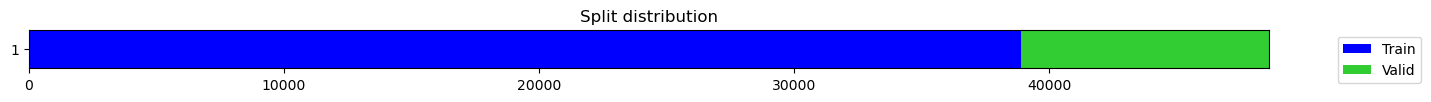

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [12]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=False)
tfms  = [None, TSRegression()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets